In [2]:
import pandas as pd
df = pd.read_csv('attrition.csv')  # Your file!
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nQuitters:", df['Attrition'].value_counts())


First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionL

In [3]:
# Make Yes/No = 1/0 for math
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Pick 4 easy columns (like Excel filters)
simple_data = df[['Age', 'MonthlyIncome', 'JobSatisfaction', 'Attrition']].dropna()
print("Clean data ready:")
print(simple_data.head())


Clean data ready:
   Age  MonthlyIncome  JobSatisfaction  Attrition
0   41           5993                4          1
1   49           5130                2          0
2   37           2090                3          1
3   33           2909                3          0
4   27           3468                2          0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Questions (X) vs Answers (y)
X = simple_data[['Age', 'MonthlyIncome', 'JobSatisfaction']]
y = simple_data['Attrition']

# Split: 80% learn, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create brain + teach it
model = LogisticRegression()
model.fit(X_train, y_train)

# Test it!
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"🎉 YOUR MODEL ACCURACY: {accuracy:.2%} ({accuracy*100:.0f}%)")
print("\nDetailed Report:")
print(classification_report(y_test, predictions))


🎉 YOUR MODEL ACCURACY: 86.73% (87%)

Detailed Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\wwwmp\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\wwwmp\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\wwwmp\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Matplotlib is building the font cache; this may take a moment.


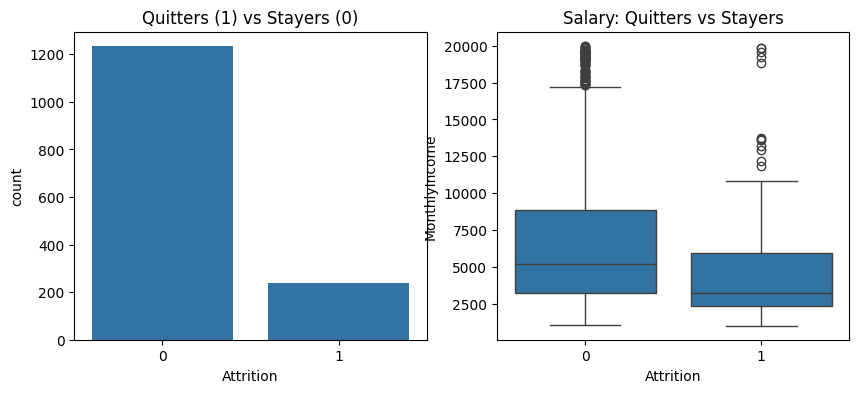

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Quitters vs Stayers
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='Attrition', data=df)
plt.title("Quitters (1) vs Stayers (0)")

# Chart 2: Salary vs Quitting
plt.subplot(1,2,2)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Salary: Quitters vs Stayers")
plt.show()


In [6]:
# Save results for report
results = {
    'Accuracy': f"{accuracy:.2%}",
    'Total Employees': len(df),
    'Quitters': int(df['Attrition'].sum()),
    'Stayers': len(df) - int(df['Attrition'].sum())
}
print("COPY THIS FOR REPORT:")
for key, value in results.items():
    print(f"{key}: {value}")


COPY THIS FOR REPORT:
Accuracy: 86.73%
Total Employees: 1470
Quitters: 237
Stayers: 1233
